In [1]:
from libpysal import weights, examples
from contextily import add_basemap
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import geopandas
import pandas as pd



<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
def stats(G, path, path_w):
    subG = G.subgraph(path)
    print('Normal route: ')
    print('total weight: ', subG.size(weight="weight"))
    print('total noise: ', subG.size(weight="noise"))
    print('total dist: ', subG.size(weight="dist"))
    print('total pollution: ', subG.size(weight="rang"))
    print('')
    subG_w = G.subgraph(path_w)
    print('Green route: ')
    print('total weight: ', subG_w.size(weight="weight"))
    print('total noise: ', subG_w.size(weight="noise"))
    print('total dist: ', subG_w.size(weight="dist"))
    print('total pollution: ', subG_w.size(weight="rang"))
    print('_______________')
    print('Improvement: ')
    print('total weight: ', subG_w.size(weight="weight")/subG.size(weight="weight")*100, '%')
    print('total noise: ', subG_w.size(weight="noise")/subG.size(weight="noise")*100, '%')
    print('total dist: ', subG_w.size(weight="dist")/subG.size(weight="dist")*100, '%')
    print('total pollution: ', subG_w.size(weight="rang")/subG.size(weight="rang")*100, '%')

In [3]:
def stats_alpha(alpha, from_node, to_node, verbose = 1):

    def weight(row, alpha):
        beta = 1 - alpha
        return alpha * row.TOTAL_D + alpha * row.Rang + beta * row.LONGITUD
    edges['weights'] = edges.apply (lambda row: weight(row, alpha), axis=1)
    G = nx.Graph()
    for i, edge in edges.iterrows():
        G.add_edge(edge['FID_x'], edge['FID_y'], noise =  edge['TOTAL_D'], rang = edge['Rang'],  dist = edge['LONGITUD'], weight=edge['weights'])

    path_w = nx.shortest_path(G,from_node,to_node, 'weight')
    path = nx.shortest_path(G,from_node,to_node, 'dist')
        
    subG = G.subgraph(path)
    subG_w = G.subgraph(path_w)
    imp_w = subG_w.size(weight="weight")/subG.size(weight="weight")*100
    imp_d = subG_w.size(weight="dist")/subG.size(weight="dist")*100
    imp_p =  subG_w.size(weight="rang")/subG.size(weight="rang")*100
    imp_n = subG_w.size(weight="noise")/subG.size(weight="noise")*100
    
    if verbose == 1:
        print('Normal route: ')
        print('total weight: ', subG.size(weight="weight"))
        print('total noise: ', subG.size(weight="noise"))
        print('total dist: ', subG.size(weight="dist"))
        print('total pollution: ', subG.size(weight="rang"))
        print('')
        print('Green route: ')
        print('total weight: ', subG_w.size(weight="weight"))
        print('total noise: ', subG_w.size(weight="noise"))
        print('total dist: ', subG_w.size(weight="dist"))
        print('total pollution: ', subG_w.size(weight="rang"))
        print('_______________')
        print('Improvement: ')
        print('total weight: ', subG_w.size(weight="weight")/subG.size(weight="weight")*100, '%')
        print('total noise: ', subG_w.size(weight="noise")/subG.size(weight="noise")*100, '%')
        print('total dist: ', subG_w.size(weight="dist")/subG.size(weight="dist")*100, '%')
        print('total pollution: ', subG_w.size(weight="rang")/subG.size(weight="rang")*100, '%')
    return imp_w, imp_d, imp_p, imp_n
        

In [7]:
import pickle
with open('../data/positions.pkl', 'rb') as f:
    positions = pickle.load(f)

In [9]:
edges = pd.read_csv('../data/graph_mix.csv')

In [6]:
def weight(row, alpha):
    beta = 1 - alpha
    return alpha * row.TOTAL_D + alpha * row.Rang + beta * row.LONGITUD

alpha = 0.7
edges['weights'] = edges.apply (lambda row: weight(row, alpha), axis=1)

In [7]:
edges

,FID_x,FID_y,TOTAL_D,Rang,LONGITUD,weights
0,0,1,65,15,42.615,68.7845
1,54,1,55,15,90.083,76.0249
2,0,16,60,15,110.589,85.6767
3,1,2,65,15,14.806,60.4418
4,8189,2,60,15,17.552,57.7656
...,...,...,...,...,...,...
14679,3182,8972,45,10,124.100,75.7300
14680,9459,9460,55,15,88.251,75.4753
14681,9462,9460,60,15,35.627,63.1881
14682,9464,9209,60,10,156.474,95.9422


In [8]:
G = nx.Graph()
for i, edge in edges.iterrows():
    G.add_edge(edge['FID_x'], edge['FID_y'], noise =  edge['TOTAL_D'], rang = edge['Rang'],  dist = edge['LONGITUD'], weight=edge['weights'])


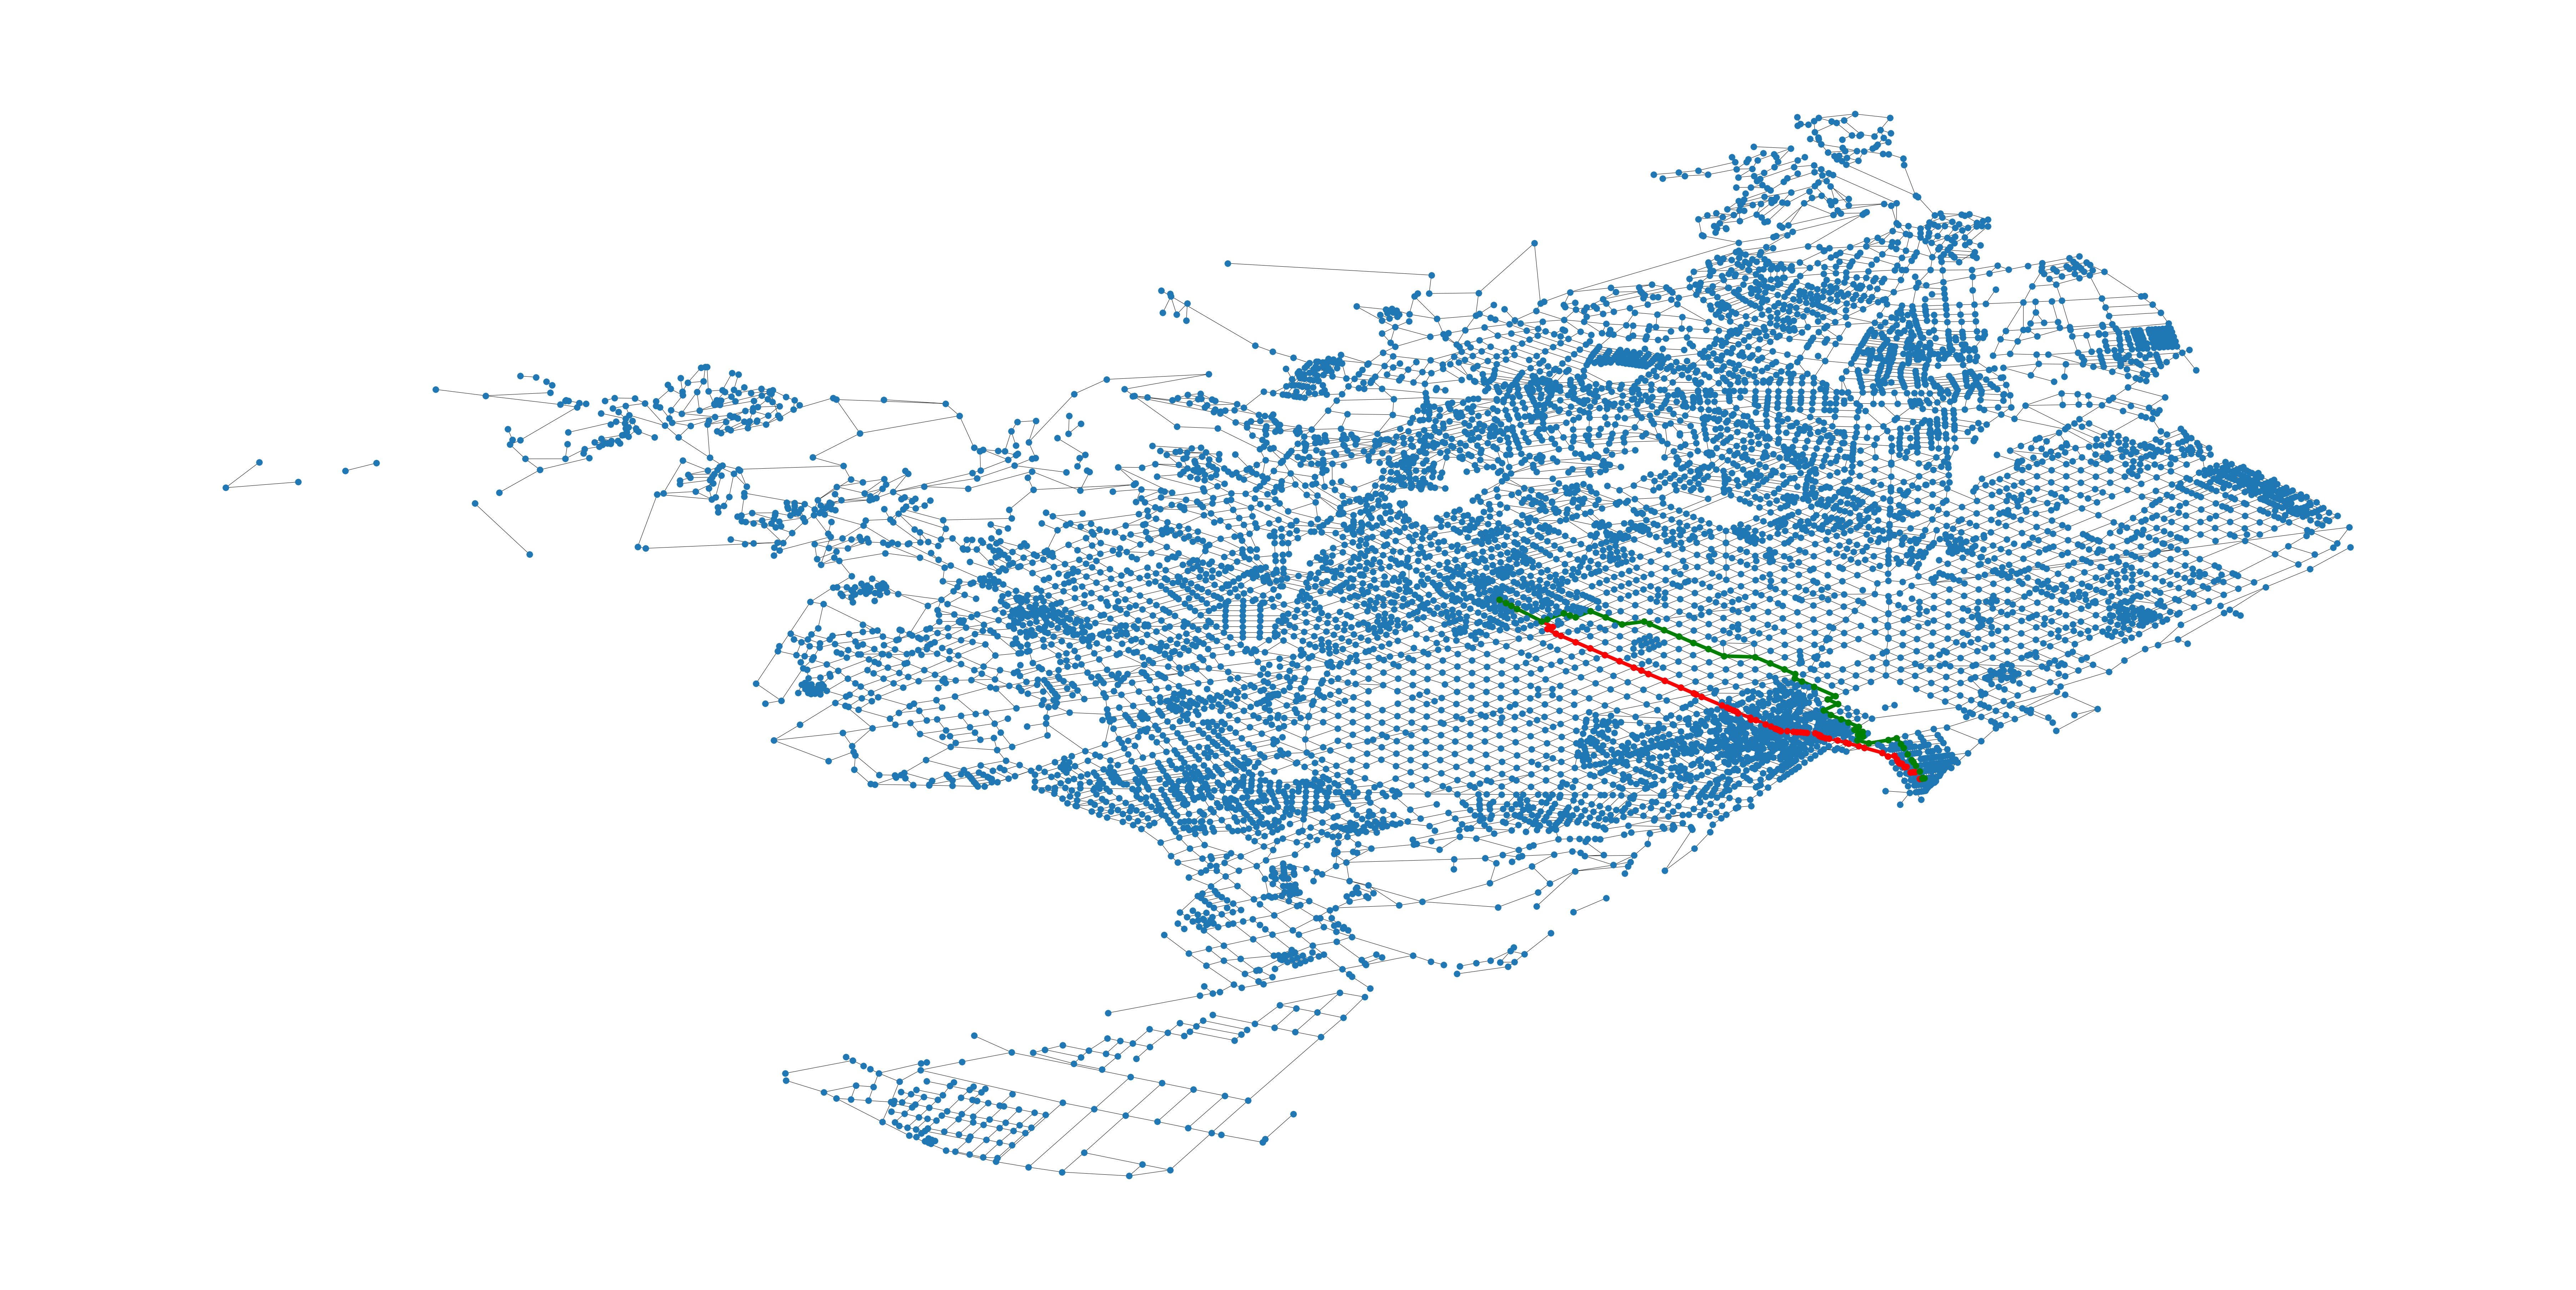

In [11]:
from_node = 22
to_node = 4300


path_w = nx.shortest_path(G,from_node,to_node, 'weight')
path = nx.shortest_path(G,from_node,to_node, 'dist')

path_edges = list(zip(path,path[1:]))
path_edges_w = list(zip(path_w,path_w[1:]))


plt.figure(figsize=[100,50])
nx.draw(G, pos=positions)
nx.draw_networkx_nodes(G,positions,nodelist=path,node_color='r')
nx.draw_networkx_edges(G,positions,edgelist=path_edges,edge_color='r',width=10)

nx.draw_networkx_nodes(G,positions,nodelist=path_w,node_color='g')
nx.draw_networkx_edges(G,positions,edgelist=path_edges_w,edge_color='g',width=10)

plt.show()

In [ ]:
stats(G, path, path_w)

In [ ]:
alphas

In [ ]:
alphas = np.linspace(0, 1, 10)
imp_d_list = []
imp_n_list = []
imp_p_list = []
for alpha in alphas:
    imp_w, imp_d, imp_p, imp_n = stats_alpha(alpha, 300, 4000, verbose = 0)
    imp_d_list.append(imp_d)
    imp_n_list.append(imp_n)
    imp_p_list.append(imp_p)
    
plt.plot(alphas, imp_d_list, label = 'distance')
plt.plot(alphas, imp_n_list, label = 'noise')
plt.plot(alphas, imp_p_list, label = 'pollution')
plt.xlabel('Alpha')
plt.ylabel('%')
plt.legend()
plt.show()

In [ ]:
for n in range(len(path_w)-1):
    edge = [int(path_w[n]), path_w[n+1]]
    print(edge)
    print(edges[edges['FID_x']==int(path_w[n])])
    print(edges[(edges['FID_x']==int(path_w[n])) & (edges['FID_y']==int(path_w[n+1]))])
    print(edges[(edges['FID_x']==int(path_w[n])) & (edges['FID_y']==int(path_w[n+1]))])

    

In [ ]:
from_node = 3400
to_node = 4300


cost_w, path_w = nx.bidirectional_dijkstra(G,from_node,to_node, 'weight')
cost, path = nx.bidirectional_dijkstra(G,from_node,to_node, 1)

print('Weights: ')
print(path_w)
print('Cost: ', cost_w)
print('---------------')
print('No weights: ', )
print(path)
print('Cost: ', cost)

path_edges = list(zip(path,path[1:]))
path_edges_w = list(zip(path_w,path_w[1:]))


plt.figure(figsize=[100,50])
nx.draw(G, pos=positions)
nx.draw_networkx_nodes(G,positions,nodelist=path,node_color='r')
nx.draw_networkx_edges(G,positions,edgelist=path_edges,edge_color='r',width=10)

nx.draw_networkx_nodes(G,positions,nodelist=path_w,node_color='g')
nx.draw_networkx_edges(G,positions,edgelist=path_edges_w,edge_color='g',width=10)

plt.show()

## Mix